# Basic Skeleton code for getting the confirmed cases, deaths and recovery cases to date over the days and scraping data from websites

In [139]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

In [140]:
# Getting the news on lockdown in different countries. 
url = 'https://www.businessinsider.com/countries-on-lockdown-coronavirus-italy-2020-3'
response = requests.get(url)
response
soup = BeautifulSoup(response.text, "html.parser")
business_insider_news_headline=[]
for i in soup.findAll('h2',class_="slide-title-text"):
    if re.search('">(.*)</h2>', str(i))!=None:
        business_insider_news_headline.append((re.search('">(.*)</h2>', str(i)).group()[2:].replace("</h2>","").replace(".","")))    
print(*business_insider_news_headline, sep = "\n") 

Russia will have a paid 'stay at home' holiday this week On Monday, Moscow's residents were ordered to stay in their houses and will soon need passes for their movements
South Africa went into a 21-day lockdown on Thursday
New Zealand enacted a mandatory 14-day quarantine for all individuals entering the country The country went on full lockdown on Wednesday
Saudi Arabia locked down its capital and two holy cities on Wednesday On Sunday, it locked down the city of Jeddah
Colombia began a nationwide quarantine on March 24, with people over the age of 70 told to remain indoors until May
India went into full coronavirus lockdown for 21 days on March 24
The UK went into full coronavirus lockdown on March 23
Australia closed non-essential businesses on March 23 On Tuesday, the most populous state in the country was put into a stricter lockdown
China implemented what was then the largest quarantine in human history to try to contain the coronavirus, locking down at least 16 cities at the end

In [141]:
# Getting the list of all countries in the world. Can be used for pattern matching in web scraped data later from text if required.
import re
list_of_countries=[]
url = 'https://history.state.gov/countries/all'
response = requests.get(url)
response
soup = BeautifulSoup(response.text, "html.parser")
soup.findAll("a", href=re.compile("countries"))
for country in soup.findAll("a", href=lambda href: href and "countries" in href)[5:]:
    if re.search('">(.*)</a>', str(country))!=None:
        result = re.search('">(.*)</a>', str(country)).group()[2:].replace("</a>","").replace("*","").replace(", The","")    
        list_of_countries.append(result)
list_of_countries.remove('Countries')

Text(0.5, 1.0, 'Confirmed verus day')

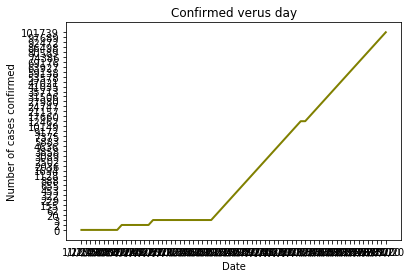

In [142]:
# Plotting the graphs for the countries' recovered, diagnosed and death time series.
import requests
import lxml.html as lh
import pandas as pd
import matplotlib.pyplot as plt
x_values_for_graph=[]
url='https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
page = requests.get(url)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')
tr_elements = doc.xpath('//tr')
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0][5:]:

    x_values_for_graph.append(t.text_content())
   
for country in range(1,len(tr_elements)):
    y_values_for_country=[]
    for val in range(5, len(tr_elements[0])):
        y_values_for_country.append(tr_elements[country][val].text_content())
# Sample plotting for italy. Can be changed to plot any country's figures
    if 'italy' in ((tr_elements[country][2].text_content())).lower():   
        plt.plot( x_values_for_graph, y_values_for_country,  marker='', color='olive', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Number of cases confirmed') 
plt.title('Confirmed verus day')

Text(0.5, 1.0, 'Deaths verus day')

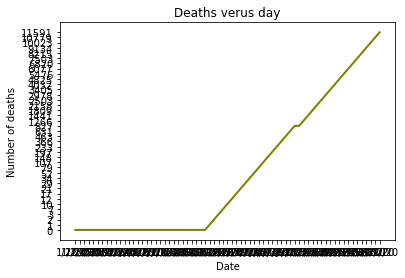

In [143]:
# Plotting the graphs for the countries' recovered, diagnosed and death time series.
import requests
import lxml.html as lh
import pandas as pd
import matplotlib.pyplot as plt
x_values_for_graph=[]
url='https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
page = requests.get(url)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')
tr_elements = doc.xpath('//tr')
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0][5:]:

    x_values_for_graph.append(t.text_content())
   
for country in range(1,len(tr_elements)):
    y_values_for_country=[]
    for val in range(5, len(tr_elements[0])):
        y_values_for_country.append(tr_elements[country][val].text_content())
    if 'italy' in tr_elements[country][2].text_content().lower():
        plt.plot( x_values_for_graph, y_values_for_country,  marker='', color='olive', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Number of deaths')                                   
plt.title('Deaths verus day')


Text(0.5, 1.0, 'Recovery verus day')

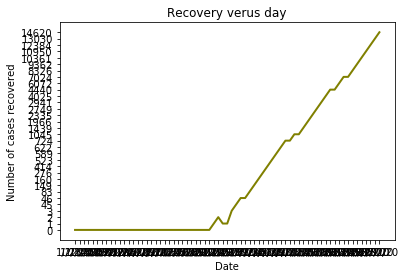

In [144]:
# Plotting the graphs for the countries' recovered, diagnosed and death time series.
import requests
import lxml.html as lh
import pandas as pd
import matplotlib.pyplot as plt
x_values_for_graph=[]
url='https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
page = requests.get(url)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')
tr_elements = doc.xpath('//tr')
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0][5:]:

    x_values_for_graph.append(t.text_content())
   
for country in range(1,len(tr_elements)):
    y_values_for_country=[]
    for val in range(5, len(tr_elements[0])):
        y_values_for_country.append(tr_elements[country][val].text_content())
    if 'italy' in ((tr_elements[country][2].text_content())).lower():   # Sample plotting for italy. Can be changed to plot any country's figures
        plt.plot( x_values_for_graph, y_values_for_country,  marker='', color='olive', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Number of cases recovered')
plt.title('Recovery verus day')